# EXPLORATORY DATA ANALYSIS _ALGIERS


## 1. LIBRARIES AND DATA 

In [12]:
# importing libraries 
import pandas as pd

import darts as dts
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.metrics import *
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis

In [8]:
# importing dataset for Algiers
df_alg = pd.read_csv('data/alg_we.csv.csv', delimiter=',')
print(df_alg.info())
df_alg.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7913 entries, 0 to 7912
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             7913 non-null   object 
 1   weathercode (wmo code)           7913 non-null   int64  
 2   temperature_2m_max (°C)          7913 non-null   float64
 3   temperature_2m_min (°C)          7913 non-null   float64
 4   temperature_2m_mean (°C)         7913 non-null   float64
 5   apparent_temperature_max (°C)    7913 non-null   float64
 6   apparent_temperature_min (°C)    7913 non-null   float64
 7   apparent_temperature_mean (°C)   7913 non-null   float64
 8   sunrise (iso8601)                7913 non-null   object 
 9   sunset (iso8601)                 7913 non-null   object 
 10  precipitation_sum (mm)           7913 non-null   float64
 11  rain_sum (mm)                    7913 non-null   float64
 12  snowfall_sum (cm)   

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,2002-01-01,3,15.4,10.5,12.2,11.9,7.5,9.2,2002-01-01T09:00,2002-01-01T18:42,0.0,0.0,0.0,0,25.2,41.8,76,6.89,1.27
1,2002-01-02,51,16.2,9.8,12.2,14.1,6.7,9.4,2002-01-02T09:00,2002-01-02T18:42,0.6,0.6,0.0,2,19.1,34.6,128,6.93,1.65
2,2002-01-03,51,17.2,8.4,12.0,15.1,5.2,9.9,2002-01-03T09:00,2002-01-03T18:43,0.1,0.1,0.0,1,13.7,24.1,203,10.43,1.87


## 2. TIME SERIES EXPLORATION

<Axes: xlabel='time'>

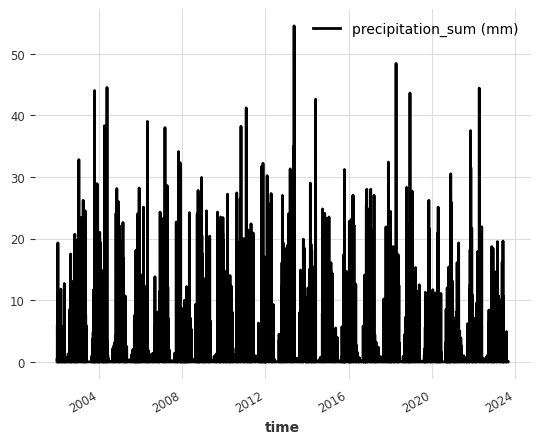

In [10]:
# plot time series
series_alg = TimeSeries.from_dataframe(df_alg, 'time', 'precipitation_sum (mm)')
series_alg.plot()

In [13]:
dts.utils.statistics.check_seasonality(series_alg, m=None, max_lag=24, alpha=0.05)

(True, 6)

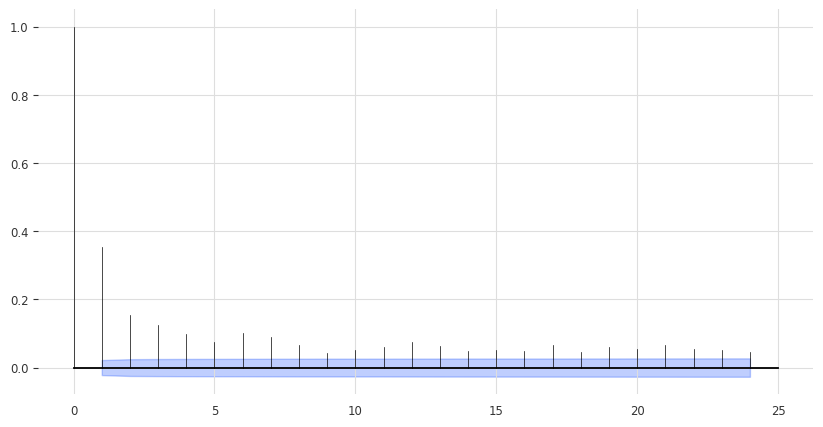

In [14]:
dts.utils.statistics.plot_acf(series_alg, m=None, max_lag=24, alpha=0.05, bartlett_confint=True, fig_size=(10, 5), axis=None, default_formatting=True)